https://udlbook.github.io/udlbook/

https://github.com/udlbook/udlbook/blob/main/Notebooks/Chap06/6_1_Line_Search.ipynb

# **Блокнот 6.1: Линейный поиск**

В этом блокноте рассматривается, как найти минимум 1D-функции с помощью линейного поиска, как показано на рисунке 6.10.

Пройдитесь по ячейкам ниже, запуская каждую ячейку по очереди. В разных местах вы увидите метку "TODO". Следуйте инструкциям в этих местах и сделайте прогнозы о том, что произойдет, или напишите код для выполнения функций.

In [1]:
# импорт библиотек
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Давайте создадим простую 1D-функцию
def loss_function(phi):
  return 1- 0.5 * np.exp(-(phi-0.65)*(phi-0.65)/0.1) - 0.45 *np.exp(-(phi-0.35)*(phi-0.35)/0.02)

def draw_function(loss_function, a=None, b=None, c=None, d=None):
  # Построим график функции
  phi_plot = np.arange(0,1,0.01);
  fig,ax = plt.subplots()
  ax.plot(phi_plot,loss_function(phi_plot),'r-')
  ax.set_xlim(0,1); ax.set_ylim(0,1)
  ax.set_xlabel('$\phi$'); ax.set_ylabel('$L[\phi]$')
  if a is not None and b is not None and c is not None and d is not None:
      plt.axvspan(a, d, facecolor='k', alpha=0.2)
      ax.plot([a,a],[0,1],'b-')
      ax.plot([b,b],[0,1],'b-')
      ax.plot([c,c],[0,1],'b-')
      ax.plot([d,d],[0,1],'b-')
  plt.show()


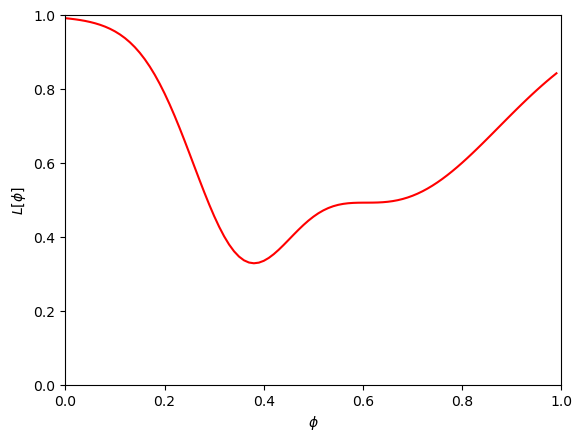

In [3]:
# Построим график функции
draw_function(loss_function)

Теперь давайте создадим функцию линейного поиска, чтобы найти минимум в диапазоне 0,1

In [4]:
def line_search(loss_function, thresh=.0001, max_iter = 10, draw_flag = False):

    # Инициализируем четыре точки в диапазоне, в котором мы собираемся искать
    a = 0
    b = 0.33
    c = 0.66
    d = 1.0
    n_iter = 0;

    # Пока мы не нашли минимум достаточно точно
    while np.abs(b-c) > thresh and n_iter < max_iter:
        # Увеличим счетчик итераций (просто чтобы предотвратить бесконечный цикл)
        n_iter = n_iter+1

        # Вычислим все четыре точки
        lossa = loss_function(a)
        lossb = loss_function(b)
        lossc = loss_function(c)
        lossd = loss_function(d)

        if draw_flag:
          draw_function(loss_function, a,b,c,d)

        print('Iter %d, a=%3.3f, b=%3.3f, c=%3.3f, d=%3.3f'%(n_iter, a,b,c,d))

        # Правило #1 Если ВЫСОТА в точке A меньше высоты в точках B, C и D, то уменьшим значения B, C и D вдвое
        # т.е. приблизим их к исходной точке
        # TODO ЗАМЕНИТЕ ПРИВЕДЕННЫЙ НИЖЕ БЛОК КОДА ЭТИМ ПРАВИЛОМ
        if (lossa < lossb and lossa < lossc and lossa < lossd):
            b /= 2
            c /= 2
            d /= 2

        # Правило #2 Если ВЫСОТА в точке b меньше высоты в точке c, то
        #                     тогда точка d становится точкой c,
        #                     точка b становится на 1/3 между a и новым d
        #                     точка c становится на 2/3 между a и новым d
        # TODO ЗАМЕНИТЕ ПРИВЕДЕННЫЙ НИЖЕ БЛОК КОДА ЭТИМ ПРАВИЛОМ
        if (lossb < lossc):
            d = c
            b = a + 1/3 * abs(d - a) 
            c = a + 2/3 * abs(d - a)
        
        # Правило #3 Если ВЫСОТА в точке c меньше высоты в точке b, то
        #                     тогда точка a становится точкой b,
        #                     точка b становится на 1/3 между новыми a и d
        #                     точка c становится на 2/3 между новыми a и d
        # TODO ЗАМЕНИТЕ ПРИВЕДЕННЫЙ НИЖЕ БЛОК КОДА ЭТИМ ПРАВИЛОМ
        if(lossc < lossb):
            a = b
            b = a + 1/3 * abs(d - a)
            c = a + 2/3 * abs(d - a)
        
    # TODO -- КОНЕЧНЫМ РЕШЕНИЕМ ЯВЛЯЕТСЯ СРЕДНЕЕ ЗНАЧЕНИЕ B и C
    # ЗАМЕНИТЕ ЭТУ СТРОКУ
    soln = np.mean([b, c])


    return soln

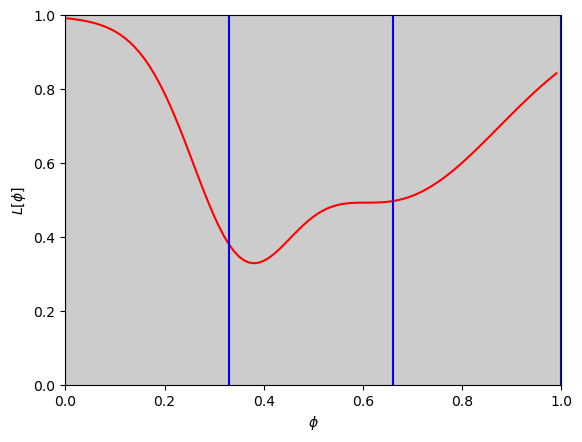

Iter 1, a=0.000, b=0.330, c=0.660, d=1.000


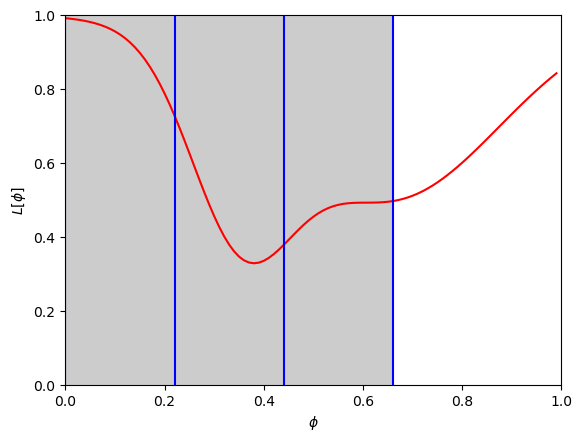

Iter 2, a=0.000, b=0.220, c=0.440, d=0.660


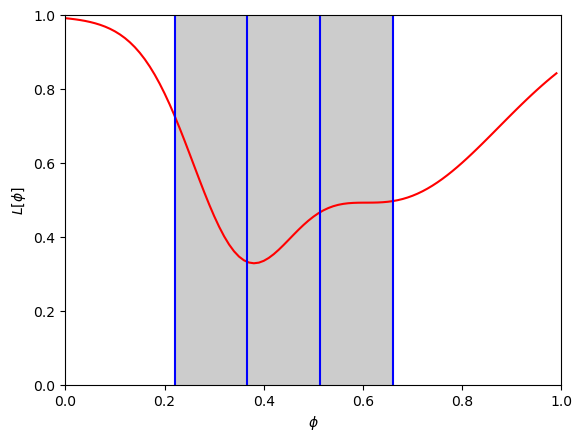

Iter 3, a=0.220, b=0.367, c=0.513, d=0.660


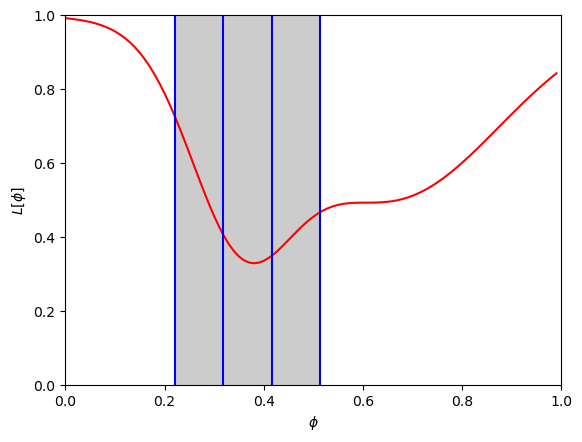

Iter 4, a=0.220, b=0.318, c=0.416, d=0.513


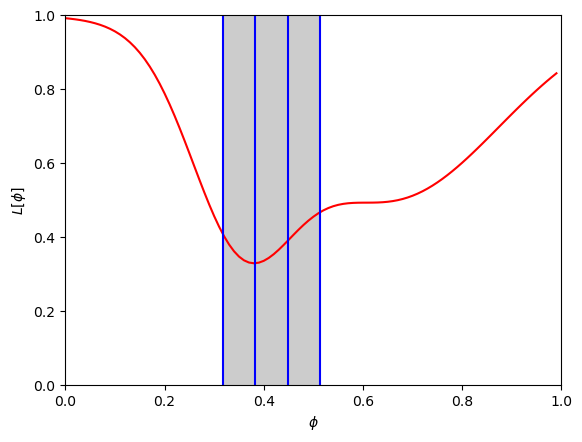

Iter 5, a=0.318, b=0.383, c=0.448, d=0.513


Iter 6, a=0.318, b=0.361, c=0.405, d=0.448


Iter 7, a=0.318, b=0.347, c=0.376, d=0.405


Iter 8, a=0.347, b=0.366, c=0.385, d=0.405


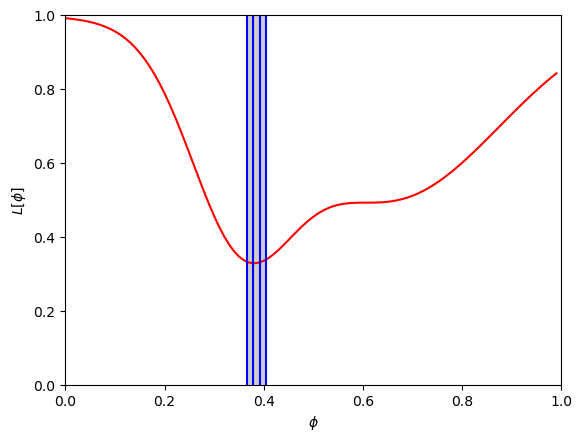

Iter 9, a=0.366, b=0.379, c=0.392, d=0.405


Iter 10, a=0.366, b=0.375, c=0.383, d=0.392
Soln = 0.383, loss = 0.329


In [5]:
soln = line_search(loss_function, draw_flag=True)
print('Soln = %3.3f, loss = %3.3f'%(soln,loss_function(soln)))